In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.figure import Figure
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heartMLSC/heart.csv")
df.shape

(918, 12)

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are total 11 columns out of which 5 have object datatype, one is of float datatype and the rest are integer datatype.

In [ ]:
# no null values 

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


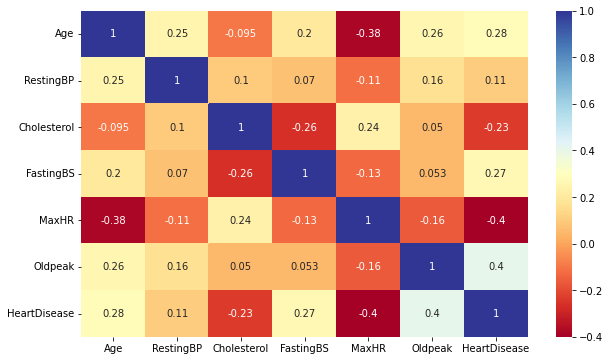

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')

In [ ]:
print("Sex:",df['Sex'].unique())
print("RestingECG:",df['RestingECG'].unique())
print("ChestPainType:",df['ChestPainType'].unique())
print("ExerciseAngina:",df['ExerciseAngina'].unique())
print("ST_Slope:",df['ST_Slope'].unique())

Sex: ['M' 'F']
RestingECG: ['Normal' 'ST' 'LVH']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


In [ ]:
df.describe(include=[object])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


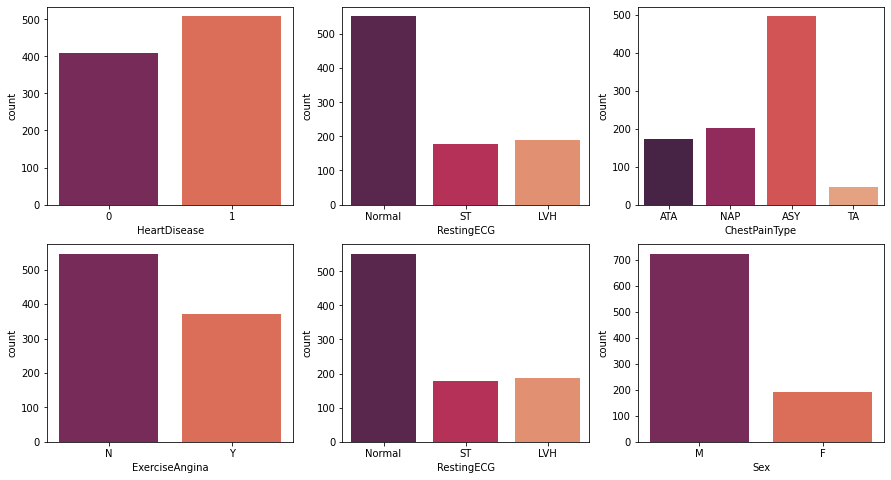

In [ ]:
f, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.countplot(x = df['HeartDisease'], data = df, palette='rocket', ax=axes[0,0])
sns.countplot(x = df['RestingECG'], data = df, palette='rocket', ax=axes[0,1])
sns.countplot(x = df['ChestPainType'], data = df, palette='rocket', ax=axes[0,2])

sns.countplot(x = df['ExerciseAngina'], data = df, palette='rocket', ax=axes[1,0])
sns.countplot(x = df['RestingECG'], data = df, palette='rocket', ax=axes[1,1])
sns.countplot(x = df['Sex'], data = df, palette='rocket', ax=axes[1,2])
plt.show()

<Figure size 720x576 with 0 Axes>

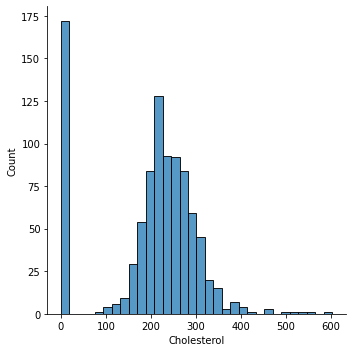

In [ ]:
plt.figure(figsize = (10, 8))
sns.displot(df['Cholesterol'])

plt.show()

# found many 0 values

In [ ]:
print("median of Cholesterol : " ,df['Cholesterol'].median())

median of Cholesterol :  223.0


In [ ]:
# 0 values replacing them with median
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].median())

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
# one hot encoding to convert categorical cols into numerical cols
encoder = ce.OneHotEncoder(use_cat_names=True)

In [ ]:
y = df['HeartDisease']

In [ ]:
# drop tagert col heart disease

X = df.drop('HeartDisease', axis='columns')

In [ ]:
#dividing the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [ ]:
print('Train :', X_train.shape, y_train.shape)
print('Test :', X_test.shape, y_test.shape)

Train : (734, 11) (734,)
Test : (184, 11) (184,)


In [ ]:
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

In [ ]:
X_train_enc

,Age,Sex_M,Sex_F,ChestPainType_ASY,ChestPainType_NAP,ChestPainType_TA,ChestPainType_ATA,RestingBP,Cholesterol,FastingBS,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,MaxHR,ExerciseAngina_Y,ExerciseAngina_N,Oldpeak,ST_Slope_Flat,ST_Slope_Up,ST_Slope_Down
852,43,1,0,1,0,0,0,120,177,0,1,0,0,120,1,0,2.5,1,0,0
121,52,0,1,0,1,0,0,125,272,0,0,1,0,139,0,1,0.0,0,1,0
664,65,0,1,1,0,0,0,150,225,0,1,0,0,114,0,1,1.0,1,0,0
187,41,1,0,1,0,0,0,120,237,1,0,1,0,138,1,0,1.0,1,0,0
108,50,1,0,1,0,0,0,140,129,0,0,1,0,135,0,1,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,54,0,1,0,1,0,0,108,267,0,1,0,0,167,0,1,0.0,0,1,0
72,52,1,0,1,0,0,0,120,182,0,0,1,0,150,0,1,0.0,1,0,0
908,63,1,0,1,0,0,0,140,187,0,1,0,0,144,1,0,4.0,0,1,0
235,39,1,0,0,0,0,1,120,200,0,0,1,0,160,1,0,1.0,1,0,0


In [ ]:
# model building

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

#libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# 1. logistic regression
lr = LogisticRegression(max_iter=9000, solver='lbfgs')
model1 = lr.fit(X_train_enc, y_train)
print("train accuracy:", model1.score(X_train_enc, y_train))
print("test accuracy:", model1.score(X_test_enc,y_test))


train accuracy: 0.8555858310626703
test accuracy: 0.907608695652174


In [ ]:
predictions = model1.predict(X_test_enc)
predictions

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
print("classification report for logistic regression \n ")
print(classification_report(y_test,predictions))

classification report for logistic regression 
 
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.92      0.93      0.92       110

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184



In [ ]:
confusion_matrix(y_test,predictions)

array([[ 65,   9],
       [  8, 102]])

confusion matrix for logistic regression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


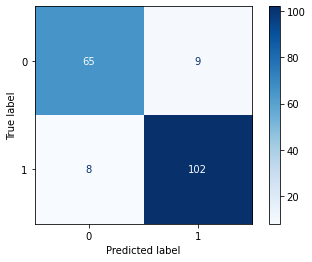

In [ ]:
#plot 
print("confusion matrix for logistic regression")
plot_confusion_matrix(model1, X_test_enc, y_test,cmap=plt.cm.Blues, values_format='d')

In [ ]:
#2. decision tree classifier
dt = DecisionTreeClassifier()
model2 = dt.fit(X_train_enc, y_train)
print("train accuracy:", model2.score(X_train_enc, y_train))
print("test accuracy:",model2.score(X_test_enc,y_test))


train accuracy: 1.0
test accuracy: 0.7934782608695652


In [ ]:
predictions = model2.predict(X_test_enc)
print("classification report for decision tree classifier \n ")
print(classification_report(y_test,predictions))

classification report for decision tree classifier 
 
              precision    recall  f1-score   support

           0       0.69      0.89      0.78        74
           1       0.91      0.73      0.81       110

    accuracy                           0.79       184
   macro avg       0.80      0.81      0.79       184
weighted avg       0.82      0.79      0.80       184



In [ ]:
confusion_matrix(y_test,predictions)

array([[66,  8],
       [30, 80]])

In [ ]:
#3. random forest classifier
rf = RandomForestClassifier()
model3 = rf.fit(X_train_enc, y_train)
print("train accuracy:",model3.score(X_train_enc, y_train))
print("test accuracy:",model3.score(X_test_enc,y_test))

train accuracy: 1.0
test accuracy: 0.8913043478260869


In [ ]:
predictions = model3.predict(X_test_enc)
print("classification report for random forest classifier \n ")
print(classification_report(y_test, predictions))


classification report for random forest classifier 
 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        74
           1       0.92      0.90      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
confusion_matrix(y_test,predictions)

array([[65,  9],
       [11, 99]])

In [ ]:
# 4. bagging classifier
bg = BaggingClassifier()
model4 = bg.fit(X_train_enc, y_train)
print("train accuracy:",model4.score(X_train_enc, y_train))
print("test accuracy:",model4.score(X_test_enc,y_test))

train accuracy: 0.989100817438692
test accuracy: 0.8695652173913043


In [ ]:
predictions = model4.predict(X_test_enc)
print("classification report for bagging classifier \n")
print(classification_report(y_test, predictions))

classification report for bagging classifier 

              precision    recall  f1-score   support

           0       0.80      0.89      0.85        74
           1       0.92      0.85      0.89       110

    accuracy                           0.87       184
   macro avg       0.86      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [ ]:
confusion_matrix(y_test,predictions)

array([[66,  8],
       [16, 94]])

In [ ]:
# 5. gradient boost classifier 
gbm = GradientBoostingClassifier()
model5 = gbm.fit(X_train_enc, y_train)
print("train accuracy:",model5.score(X_train_enc, y_train))
print("test accuracy:",model5.score(X_test_enc,y_test))

train accuracy: 0.9495912806539509
test accuracy: 0.8858695652173914


In [ ]:
predictions = model5.predict(X_test_enc)
print("classification report for gradient boost classifier \n")
print(classification_report(y_test, predictions))

classification report for gradient boost classifier 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        74
           1       0.92      0.89      0.90       110

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
confusion_matrix(y_test,predictions)

array([[65,  9],
       [12, 98]])

In [ ]:
# 6. adaboost classifier 
ada = AdaBoostClassifier()
model6 = ada.fit(X_train_enc, y_train)
print("train accuracy:",model6.score(X_train_enc, y_train))
print("test accuracy:",model6.score(X_test_enc,y_test))


train accuracy: 0.8705722070844687
test accuracy: 0.8913043478260869


In [ ]:
predictions = model6.predict(X_test_enc)
print("classification report for adaboost classifier \n")
print(classification_report(y_test, predictions))

classification report for adaboost classifier 

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        74
           1       0.93      0.88      0.91       110

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
confusion_matrix(y_test,predictions)

array([[67,  7],
       [13, 97]])

In [ ]:
# 7. voting classifer = GB + RF
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier()

vc = VotingClassifier(estimators=[('ext', clf1),('gbm', clf2)], voting='soft')
model7 = vc.fit(X_train_enc, y_train)
print("train accuracy:",model7.score(X_train_enc, y_train))
print("test accuracy:",model7.score(X_test_enc,y_test))

train accuracy: 0.9782016348773842
test accuracy: 0.8967391304347826


In [ ]:
vcpred = vc.predict(X_test_enc)
print("classification report for voting classifier")
print(classification_report(vcpred,y_test))

classification report for voting classifier
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        73
           1       0.92      0.91      0.91       111

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



In [ ]:
confusion_matrix(y_test,vcpred)

array([[ 64,  10],
       [  9, 101]])

In [ ]:
# models

1.   Logistic Regression : 91%

1.  Decision Tree : 79%

1.   Random Frorest : 89 %

1.   Bagging Classifier : 87 %

1.   Gradient Boost : 89 % 

1.   Adaboost : 89 %
1.   Voting Classifier : 90%

From the above fitted models Gradient Boost & Voting classifier has the highest classification accuracy of 90 % 
 



In [ ]:
# taking inputs from user & making predictions

In [ ]:
d = {}
d['MaxHR'] = float(input('What is Max Heart rate of the patient ?'))
d['Age'] = float(input('What is age of the patient ?'))
d['Sex'] = input('What is Sex of the patient (M or F) ?')
d['RestingBP'] = float(input('What is Resting blood pressure of the patient ?'))
d['Cholesterol'] = float(input('What is Cholesterol of the patient ?'))
d['ExcerciseAngina'] = input('Does the patient have excercise induced angina (Y or N) ?')
d['FastingBS'] = float(input('What is fasting blood sugar of the patient ? [1 : FastingBS > 120 mg/dl, 0 : otherwise]'))
d['ChestPainType'] = input('What is ChestPainType of the patient ?(use capital letters)[TA: Typical Angina , ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]')
d['ST_Slope'] = input('What is Resting ST slope of the patient (Up, flat, down) ?')
d['RestingECG'] = input('What is Resting ECG of the patient (LHV, Normal, ST)?')
d['Oldpeak'] = float(input('What is Oldpeak value of the patient ?'))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

What is Max Heart rate of the patient ? 150
What is age of the patient ? 65
What is Sex of the patient (M or F) ? F
What is Resting blood pressure of the patient ? 150
What is Cholesterol of the patient ? 220
Does the patient have excercise induced angina (Y or N) ? N
What is fasting blood sugar of the patient ? [1 : FastingBS > 120 mg/dl, 0 : otherwise] 1
What is ChestPainType of the patient ?(use capital letters)[TA: Typical Angina , ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]NAP
What is Resting ST slope of the patient (Up, flat, down) ? Up
What is Resting ECG of the patient (LHV, Normal, ST)? Normal
What is Oldpeak value of the patient ? 1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
print(d)

{'MaxHR': 150.0, 'Age': 65.0, 'Sex': ' F', 'RestingBP': 150.0, 'Cholesterol': 220.0, 'ExcerciseAngina': ' N', 'FastingBS': 1.0, 'ChestPainType': 'NAP', 'ST_Slope': ' Up', 'RestingECG': ' Normal', 'Oldpeak': 1.0}


In [ ]:
unseen = pd.DataFrame(d.items(), index = d).T
unseen = unseen.drop([0])
unseen

,MaxHR,Age,Sex,RestingBP,Cholesterol,ExcerciseAngina,FastingBS,ChestPainType,ST_Slope,RestingECG,Oldpeak
1,150.0,65.0,F,150.0,220.0,N,1.0,NAP,Up,Normal,1.0


In [ ]:
 unseen1 = unseen.drop(columns=['Sex','ExcerciseAngina','ChestPainType','ST_Slope','RestingECG'])
 unseen1

,MaxHR,Age,RestingBP,Cholesterol,FastingBS,Oldpeak
1,150.0,65.0,150.0,220.0,1.0,1.0


In [ ]:
# to convert categorical col into numerical 
encoder2 = ce.OneHotEncoder(use_cat_names=True)
encoder2.fit(unseen[['Sex','ExcerciseAngina','ChestPainType','ST_Slope','RestingECG']])
unseen_enc = encoder2.transform(unseen[['Sex','ExcerciseAngina','ChestPainType','ST_Slope','RestingECG']])
unseen_enc



,Sex_ F,ExcerciseAngina_ N,ChestPainType_NAP,ST_Slope_ Up,RestingECG_ Normal
1,1,1,1,1,1


In [ ]:
# to concat
unseen_with_encoding = pd.concat([unseen_enc, unseen1], axis=1, join="inner")
unseen_with_encoding

,Sex_ F,ExcerciseAngina_ N,ChestPainType_NAP,ST_Slope_ Up,RestingECG_ Normal,MaxHR,Age,RestingBP,Cholesterol,FastingBS,Oldpeak
1,1,1,1,1,1,150.0,65.0,150.0,220.0,1.0,1.0


In [ ]:
# to make list
list1=list(unseen_with_encoding.columns.values)
list1

['Sex_ F',
 'ExcerciseAngina_ N',
 'ChestPainType_NAP',
 'ST_Slope_ Up',
 'RestingECG_ Normal',
 'MaxHR',
 'Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'Oldpeak']